In [73]:
import numpy as np
from scipy import linalg as lg
from scipy.linalg import svd
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer 
from nltk.tokenize import TreebankWordTokenizer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

## Problem 1

In [25]:
A = np.array([[3,1,1],[-1,3,1]])
print(A)

[[ 3  1  1]
 [-1  3  1]]


In [33]:
V, Sigma, Ustar = svd(A)

In [34]:
sigmaMatrix = np.diag(Sigma) 
z= np.zeros((2,1)) 
sigmaMatrix_extended = np.hstack((sigmaMatrix,z))
res=np.dot(V, sigmaMatrix_extended) 
recreateA = np.dot(res, Ustar)
recreateA

array([[ 3.,  1.,  1.],
       [-1.,  3.,  1.]])

In [35]:
B = np.array([[1,1],[0,1], [-1,1]])
print(B)

[[ 1  1]
 [ 0  1]
 [-1  1]]


In [72]:
V, Sigma, Ustar = svd(B)
sigmaMatrix = np.diag(Sigma) 
z= np.zeros((1,2)) 
sigmaMatrix_extended = np.vstack((sigmaMatrix,z))
res=np.dot(V, sigmaMatrix_extended) 
recreateB = np.dot(res, Ustar)
recreateB

array([[ 1.,  1.],
       [ 0.,  1.],
       [-1.,  1.]])

## Problem 2 1)

In [148]:
corpus = ['runs','runs pitcher innings','pitcher','touchdown','quarterback','touchdown quarterback']

In [149]:
vectorizer = CountVectorizer() 
bag_of_words = vectorizer.fit_transform(corpus)

In [150]:
df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names())

In [151]:
np.set_printoptions(precision=8, suppress=True)

In [152]:
def normalized(pt1): 
    return pt1/np.linalg.norm(pt1)

In [153]:
A = bag_of_words.toarray()[0]
B = bag_of_words.toarray()[1]
C = bag_of_words.toarray()[2]
D = bag_of_words.toarray()[3]
E = bag_of_words.toarray()[4]
F = bag_of_words.toarray()[5]
vectors = [A,B,C,D, E, F]

In [154]:
Anormalized = normalized(A)
Bnormalized = normalized(B)
Cnormalized = normalized(C)
Dnormalized = normalized(D)
Enormalized = normalized(E)
Fnormalized = normalized(F)
vectorsNormalized = [Anormalized, Bnormalized, Cnormalized, Dnormalized, Enormalized, Fnormalized]

In [155]:
def cosine_Similarity (pt1, pt2): 
    return np.dot(pt1,pt2)

In [156]:
numDocu = len(corpus) 
cosine_SimMatrix = np.zeros((numDocu, numDocu))
cosine_DisMatrix = np.zeros((numDocu, numDocu))

In [157]:
for i in range(numDocu): 
    for j in range(numDocu): 
        cosine_SimMatrix[i,j] = cosine_Similarity(vectorsNormalized[i], vectorsNormalized[j]) 
        cosine_DisMatrix[i,j] = 1 - cosine_SimMatrix[i,j]

In [158]:
print('Cosine Similarity')
print(cosine_SimMatrix)

print()
print('Cosine Distance')
print(cosine_DisMatrix)

Cosine Similarity
[[1.         0.57735027 0.         0.         0.         0.        ]
 [0.57735027 1.         0.57735027 0.         0.         0.        ]
 [0.         0.57735027 1.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.70710678]
 [0.         0.         0.         0.         1.         0.70710678]
 [0.         0.         0.         0.70710678 0.70710678 1.        ]]

Cosine Distance
[[ 0.          0.42264973  1.          1.          1.          1.        ]
 [ 0.42264973 -0.          0.42264973  1.          1.          1.        ]
 [ 1.          0.42264973  0.          1.          1.          1.        ]
 [ 1.          1.          1.          0.          1.          0.29289322]
 [ 1.          1.          1.          1.          0.          0.29289322]
 [ 1.          1.          1.          0.29289322  0.29289322  0.        ]]


## Problem 2 2)

In [95]:
A_word = bag_of_words.todense().T
A_word

matrix([[0, 1, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1],
        [1, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1]], dtype=int64)

In [96]:
A_doc = bag_of_words.todense()
A_doc

matrix([[0, 0, 0, 1, 0],
        [1, 1, 0, 1, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 1]], dtype=int64)

## Problem 3

In [109]:
np.set_printoptions(precision=8, suppress=True)

In [112]:
svd = TruncatedSVD(n_components = sigma_signifant_num) 
lsa_TDM = svd.fit_transform(bag_of_words.todense().T)
print(lsa_TDM)

[[ 0.88807383  0.        ]
 [ 1.21313142  0.        ]
 [-0.          1.22474487]
 [ 1.21313142 -0.        ]
 [-0.          1.22474487]]


In [114]:
lsa_DTM = svd.fit_transform(bag_of_words.todense())
print(lsa_DTM)

[[ 0.62796303 -0.        ]
 [ 1.7156269   0.        ]
 [ 0.62796303 -0.        ]
 [ 0.          0.70710678]
 [ 0.          0.70710678]
 [ 0.          1.41421356]]


## Problem 4

In [125]:
Anormalized = normalized([  0.62796303,  0 ])
Bnormalized = normalized([ 1.7156269,  0        ])
Cnormalized = normalized([0.62796303 ,       0])
Dnormalized = normalized([ 0, 0.70710678        ])
Enormalized = normalized([0 ,  0.70710678])
Fnormalized = normalized([0 ,  1.41421356])

vectorsNormalized = [Anormalized, Bnormalized, Cnormalized, Dnormalized, Enormalized, Fnormalized]

In [126]:
numDocu = 6
cosine_SimMatrix = np.zeros((numDocu, numDocu))
cosine_DisMatrix = np.zeros((numDocu, numDocu))

for i in range(numDocu): 
    for j in range(numDocu): 
        cosine_SimMatrix[i,j] = cosine_Similarity(vectorsNormalized[i], vectorsNormalized[j]) 
        cosine_DisMatrix[i,j] = 1 - cosine_SimMatrix[i,j]

In [127]:
print('Cosine Similarity')
print(cosine_SimMatrix)

print()
print('Cosine Distance')
print(cosine_DisMatrix)

Cosine Similarity
[[1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]]

Cosine Distance
[[0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]]


In [136]:
topic_encoded_df = pd.DataFrame(lsa_DTM, columns = ["Topic-1", "Topic-2"])
topic_encoded_df["Corpus"] = corpus 
display(topic_encoded_df[ ['Corpus', 'Topic-1', 'Topic-2']])

,Corpus,Topic-1,Topic-2
0,runs,6.279630e-01,-4.195011e-16
1,runs pitcher innings,1.715627e+00,1.444478e-16
2,pitcher,6.279630e-01,-4.604582e-17
3,touchdown,1.153397e-16,7.071068e-01
4,quarterback,1.531128e-16,7.071068e-01
5,touchdown quarterback,1.830560e-16,1.414214e+00


In [139]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Topic-2')

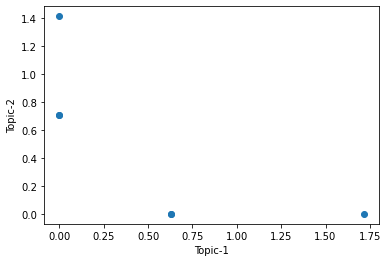

In [147]:
plt.scatter(topic_encoded_df['Topic-1'], topic_encoded_df['Topic-2'])
plt.xlabel('Topic-1')
plt.ylabel('Topic-2')

#### 5) runs, runs pitcher innings and pitcher are for topic 1, touchdown, quarterback, touchdown quarterback are for topic 2

#### 6) runs and pitcher for topic 1, touchdown and quarterback	for topic 2.